In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data=pd.read_csv(r"C:\Users\Vimalraj\OneDrive\Desktop\30_days_Machine_learning_challenge\Day2_Student_Performance_Prediction\StudentsPerformance.csv");
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
print("Shape:",data.shape)
print(data.columns)
print(data.isnull().sum())
data.info()

Shape: (1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score

In [9]:
encode=pd.get_dummies(data,drop_first=True)

In [11]:
print(encode.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

In [12]:
X=encode.drop("math score",axis=1)

In [15]:
print(X.head())

   reading score  writing score  gender_male  race/ethnicity_group B  \
0             72             74        False                    True   
1             90             88        False                   False   
2             95             93        False                    True   
3             57             44         True                   False   
4             78             75         True                   False   

   race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False                   False   
1                    True                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                    True                   False                   False   

   parental level of education_bachelor's degree  \
0                                           True   


In [17]:
y=encode["math score"]
print(y.head())

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64


In [18]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test)

In [26]:
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [27]:
print(mse)
print(rsme)
print(mae)  
print(r2)

31.46460470634979
5.609331930484217
4.4965275785129775
0.8604348832034765


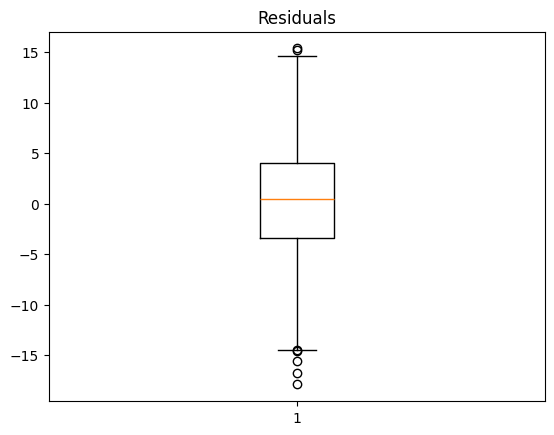

In [29]:
plt.boxplot(y_test-y_pred)
plt.title("Residuals")
plt.show()

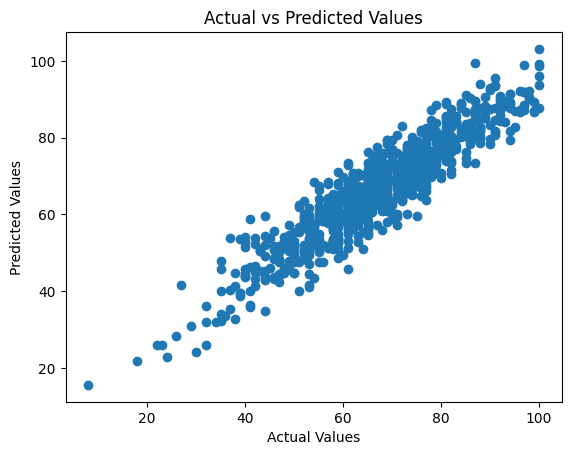

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")  
plt.title("Actual vs Predicted Values")
plt.show()

In [33]:
sample_data = X.iloc[0:1] 
predicted_score = model.predict(sample_data)
print("Predicted Math Score:", predicted_score[0])


Predicted Math Score: 64.74487852943196
